In [1]:
import numpy as np
train_percent = 50
# I will use 100 points always 
x = np.linspace(0,10,100)
train = np.sin(x[0:train_percent])
test = np.sin(x[train_percent:100])
whole = np.sin(x)

In [8]:
test

array([-0.94338126, -0.90512352, -0.85763861, -0.80141062, -0.73701276,
       -0.66510151, -0.58640998, -0.50174037, -0.41195583, -0.31797166,
       -0.22074597, -0.12126992, -0.0205576 ,  0.0803643 ,  0.18046693,
        0.27872982,  0.37415123,  0.46575841,  0.55261747,  0.63384295,
        0.7086068 ,  0.77614685,  0.83577457,  0.8868821 ,  0.92894843,
        0.96154471,  0.98433866,  0.99709789,  0.99969234,  0.99209556,
        0.97438499,  0.94674118,  0.90944594,  0.86287948,  0.8075165 ,
        0.74392141,  0.6727425 ,  0.59470541,  0.51060568,  0.42130064,
        0.32770071,  0.23076008,  0.13146699,  0.03083368, -0.07011396,
       -0.17034683, -0.26884313, -0.36459873, -0.45663749, -0.54402111])

Store all this in a dataframe so that I can store them in a pickel file

In [2]:
import pandas as pd
# convert array into dataframe 
test_df = pd.DataFrame(test) 
train_df =  pd.DataFrame(train) 
whole_df = pd.DataFrame(whole) 
# save the dataframe as a csv file 
test_df.to_csv("./synthetic_data/sinetest1.csv")
train_df.to_csv("./synthetic_data/sinetrain1.csv")
whole_df.to_csv("./synthetic_data/sinewhole1.csv")

In [3]:
x2 = np.linspace(0,10,100)
train2 = np.sin(x2[0:50]) + 0.2*np.sin(x2[0:50]*10) + 0.03*np.sin(x2[0:50]*20)
test2 = np.sin(x2[50:100]) + 0.2*np.sin(x2[50:100]*10) + 0.03*np.sin(x2[50:100]*20)
whole2 = np.sin(x2) + 0.2*np.sin(x2*10) + 0.03*np.sin(x2*20)
# convert array into dataframe 
test2_df = pd.DataFrame(test2) 
train2_df =  pd.DataFrame(train2) 
whole2_df = pd.DataFrame(whole2) 
# save the dataframe as a csv file 
test2_df.to_csv("./synthetic_data/sinetest2.csv")
train2_df.to_csv("./synthetic_data/sinetrain2.csv")
whole2_df.to_csv("./synthetic_data/sinewhole2.csv")

In [93]:
ar_high = np.array([-0.50424686,  1.37573152,  0.71285812, -1.09337974, -1.61653362,
         0.6853512 , -0.37312368,  1.50427309,  0.01644906, -0.88922894,
        -1.4263528 ,  0.02577807,  1.08788203,  0.35412927,  0.54455245,
        -0.16009542, -1.51774384,  0.17103497, -0.92733637,  0.1105833 ,
         0.09526325, -1.26938151, -0.03957398, -0.55873272, -2.06094502,
        -0.34427465,  1.99185855, -1.66208958, -1.16222327, -1.39339621,
        -0.78397035,  0.03864163, -1.70194318,  0.81069076, -0.65759863,
        -0.24789366,  0.25810964, -0.59758127,  0.77476457,  1.84428907,
         0.84024977,  0.97700921, -2.05927286,  0.59541377,  0.34905839,
         0.19227295, -0.94715642,  0.7571659 ,  1.11126631,  0.46477044,
        -0.58787603,  1.05282843, -0.33484999,  0.50861347, -1.48731505,
        -1.60372562,  1.512159  , -0.03842358,  0.22389007, -2.02014872,
         0.47912526, -2.03009049, -1.51662378,  0.11440123, -1.03269636,
         1.51413582,  1.15830166,  0.6518505 ,  0.77329162, -1.04791465,
        -0.40866289, -0.12428645,  0.46803623,  2.49381497,  0.73216499,
        -1.9635111 ,  1.40261568, -0.92063253,  0.27023893,  0.50720666,
        -0.1707714 , -0.23133199,  0.08628002, -0.40585947,  0.23499154,
        -0.77199238, -0.43813932,  0.9637006 , -0.54213742, -0.15904474,
         1.51876031, -1.70911356, -1.37445416,  1.68234864, -0.68293768,
         1.06389174, -0.04166097,  0.47342484,  0.60457459,  0.49932921])

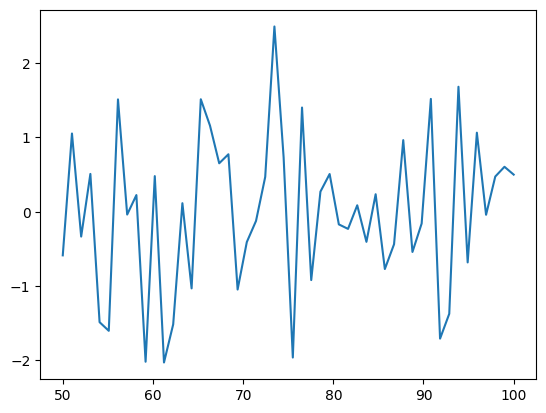

In [95]:
import matplotlib.pyplot as plt
plt.plot(np.linspace(50,100,50),ar_high[50:100])

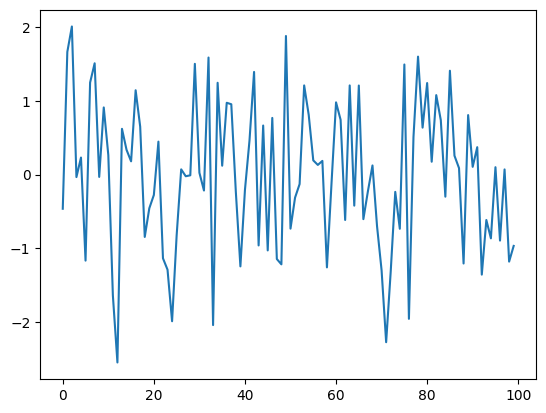

In [59]:
def generate_autoregressive_series(n_lags, decay_rate, length=100):
    # Generate random noise
    noise = np.random.randn(length)
    
    # Initialize time series with noise
    time_series = noise.copy()
    
    # Generate autoregressive time series with linearly decaying lags
    for i in range(n_lags, length):
        for j in range(1, n_lags+1):
            time_series[i] += decay_rate * (1 - j/n_lags) * time_series[i - j]
    
    return time_series

# Define parameters
length = 100
n_lags = 150
decay_rate = -0.5
ar_high = generate_autoregressive_series(n_lags, decay_rate, length)

plt.plot(ar_high)

test_ar_df = pd.DataFrame(ar_high[50:100]) 
train_ar_df =  pd.DataFrame(ar_high[0:50]) 
ar_df = pd.DataFrame(ar_high) 
# save the dataframe as a csv file 
test_ar_df.to_csv("./synthetic_data/artest3.csv")
train_ar_df.to_csv("./synthetic_data/artrain3.csv")
ar_df.to_csv("./synthetic_data/arwhole3.csv")


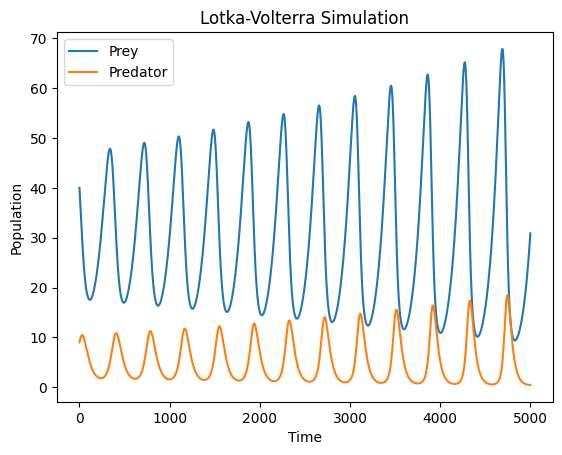

In [73]:
import numpy as np
import matplotlib.pyplot as plt

def lotka_volterra(a, b, c, d, x0, y0, timesteps):
    """
    Simulate the Lotka-Volterra equations.

    Parameters:
    a: float, prey growth rate
    b: float, predation rate
    c: float, predator death rate
    d: float, predator reproduction rate
    x0: float, initial prey population
    y0: float, initial predator population
    timesteps: int, number of time steps

    Returns:
    x_values: numpy array, prey population over time
    y_values: numpy array, predator population over time
    """

    def dx_dt(x, y):
        return a * x - b * x * y

    def dy_dt(x, y):
        return -c * y + d * x * y

    dt = 0.01  # Time step size
    x_values = np.zeros(timesteps)
    y_values = np.zeros(timesteps)

    x_values[0] = x0
    y_values[0] = y0

    for i in range(1, timesteps):
        x = x_values[i - 1]
        y = y_values[i - 1]
        x_values[i] = x + dt * dx_dt(x, y)
        y_values[i] = y + dt * dy_dt(x, y)

    return x_values, y_values

# Example usage:
a = 1
b = 0.2
c = 3
d = 0.1
x0 = 40
y0 = 9
timesteps = 5000

x_values, y_values = lotka_volterra(a, b, c, d, x0, y0, timesteps)

plt.plot(x_values, label='Prey')
plt.plot(y_values, label='Predator')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.title('Lotka-Volterra Simulation')
plt.show()


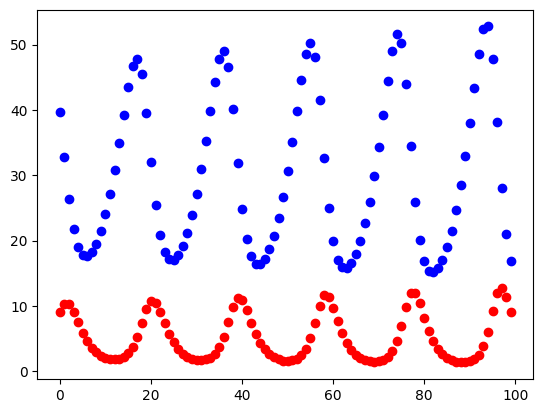

In [87]:
plt.plot(x_values[1:2000:20],'bo')
plt.plot(y_values[1:2000:20],'ro')
plt.show()

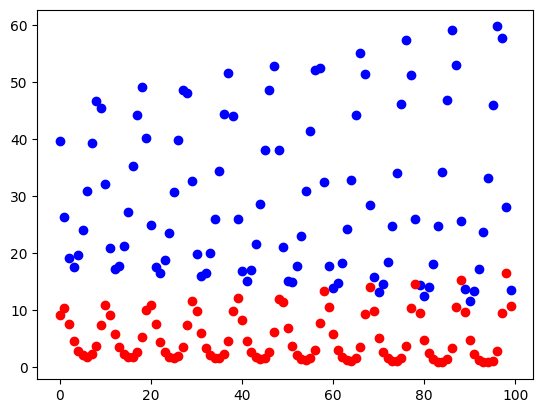

In [88]:
plt.plot(x_values[1:4000:40],'bo')
plt.plot(y_values[1:4000:40],'ro')
plt.show()

In [89]:
high_sample = np.column_stack((x_values[1:2000:20], y_values[1:2000:20]))
low_sample =  np.column_stack((x_values[1:4000:40], y_values[1:4000:40]))





In [92]:
highsample_test_df = pd.DataFrame(high_sample[50:100]) 
highsample_train_df =  pd.DataFrame(high_sample[0:50]) 
highsample_df = pd.DataFrame(high_sample) 
# save the dataframe as a csv file 
highsample_test_df.to_csv("./synthetic_data/highsample_test4.csv")
highsample_train_df.to_csv("./synthetic_data/highsample_train4.csv")
highsample_df.to_csv("./synthetic_data/highsample4.csv")

lowsample_test_df = pd.DataFrame(low_sample[50:100]) 
lowsample_train_df =  pd.DataFrame(low_sample[0:50]) 
lowsample_df = pd.DataFrame(low_sample) 
# save the dataframe as a csv file 
lowsample_test_df.to_csv("./synthetic_data/lowsample_test5.csv")
lowsample_train_df.to_csv("./synthetic_data/lowsample_train5.csv")
lowsample_df.to_csv("./synthetic_data/lowsample5.csv")
